# Librairies et importations 

In [187]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


# 1. Récupération des datasets 

## A. Emissions GHG (CO2,CH4,N20,Fgases,GHG)

### Nous allons récupérer les données des fichiers csv en fonction du type de l'émission

Fichiers csv : 
- "CO2-emissions-by-sector.csv"
- "CH4-emissions-by-sector.csv"
- "N2O-emissions-by-sector.csv"
- "Fgases-emissions-by-sector.csv"
- "GHG-emissions-by-sector.csv"

Présentation des différents secteurs : 

-Agriculture : Les émissions associées aux activités agricoles. Cela peut inclure les émissions provenant de la gestion des sols, de l'utilisation d'engrais, de la fermentation entérique chez les animaux d'élevage, etc.

-Buildings : Les émissions provenant du secteur des bâtiments, généralement liées à la consommation d'énergie pour le chauffage, la climatisation, l'éclairage et d'autres besoins énergétiques dans les bâtiments résidentiels et commerciaux.

Fuel Exploitation : Les émissions résultant de l'exploitation des combustibles fossiles, y compris l'extraction, la production et le traitement du pétrole, du gaz et du charbon.

Industrial Combustion : Les émissions résultant de la combustion de combustibles fossiles dans le secteur industriel pour la production de chaleur et d'énergie nécessaire aux processus industriels.

Power Industry : Les émissions de CO2 provenant du secteur de la production d'électricité, générées par la combustion de combustibles fossiles dans les centrales.

Processes: Les émissions provenant de divers processus industriels autres que la combustion, tels que la fabrication de ciment, la production chimique, etc. Ce sont des exemples, il en existe plein d'autres.

Transport: Les émissions générées par le secteur des transports, comprenant les émissions provenant des véhicules routiers, du transport maritime, aérien et ferroviaire, ainsi que d'autres moyens de transport.

Waste : Les émissions provenant de la gestion des déchets, y compris la décomposition des déchets organiques dans les décharges et les émissions associées à d'autres processus de traitement des déchets.

Total /cap : Les émissions totales par habitant, une mesure qui prend en compte l'ensemble des émissions d'un pays ou d'une région divisées par la population.

In [188]:
data_CO2 = pd.read_csv("CO2-emissions-by-sector.csv")
data_CH4 = pd.read_csv("CH4-emissions-by-sector.csv")
data_N2O = pd.read_csv("N2O-emissions-by-sector.csv")
data_Fgases = pd.read_csv("Fgases-emissions-by-sector.csv")
data_GHG = pd.read_csv("GHG-emissions-by-sector.csv")

On utilise la fonction .rename() de pandas pour renommer la colonne Category en Year de chaque dataframe

In [189]:
data_CO2 = data_CO2.rename(columns={'Category':'Year'})
data_CH4 = data_CH4.rename(columns={'Category':'Year'})
data_N2O = data_N2O.rename(columns={'Category':'Year'})
data_Fgases = data_Fgases.rename(columns={'Category':'Year'})
data_GHG = data_GHG.rename(columns={'Category':'Year'})

Pour pouvoir merger les dataframe en fonction de la colonne 'Year', nous allons appliquer un sufixe à chaque colonne des dataframe en fonction du type de gaz à effet de serre émis.

In [190]:
data_CO2 = data_CO2.rename(columns=lambda col: col + '-CO2' if col != 'Year' else col)
data_CO2.head()

,Year,Agriculture-CO2,Buildings-CO2,Fuel Exploitation-CO2,Industrial Combustion-CO2,Power Industry-CO2,Processes-CO2,Transport-CO2,Waste-CO2,Total CO2/cap-CO2
0,1970,49143283,2926458212,1562255701,3744304794,3823699383,915670265,2796286627,7605313,4.28
1,1971,49143283,2939568254,1574399637,3511720997,3910981426,921879024,2876504749,7779282,4.18
2,1972,49143283,3056870832,1654467714,3602041957,4189105946,990161466,3045881595,7957965,4.31
3,1973,49143283,3120449101,1828873474,3788025165,4524711259,1030394452,3221973378,8139190,4.47
4,1974,49900345,3040634678,1824605510,3774962595,4603893544,1007746632,3191503489,8320052,4.37


In [191]:
data_CH4 = data_CH4.rename(columns=lambda col: col + '-CH4' if col != 'Year' else col)
data_CH4.head()

,Year,Agriculture-CH4,Buildings-CH4,Fuel Exploitation-CH4,Industrial Combustion-CH4,Power Industry-CH4,Processes-CH4,Transport-CH4,Waste-CH4,Total CH4/cap-CH4
0,1970,3586083162,295562667,2015354707,8580075,1413346,5608009,20344155,1131046316,1.91
1,1971,3647808963,289022899,1991620043,8033084,1450008,5215240,21194747,1188468475,1.89
2,1972,3661879529,291379692,2049742730,8295522,1592332,5756597,22721891,1212408830,1.88
3,1973,3710214427,292896695,2152361604,8588179,1720306,5789461,24199328,1236369926,1.89
4,1974,3763011833,294922505,2121892209,8731193,1803342,5222439,24055041,1255712248,1.87


In [192]:
data_N2O = data_N2O.rename(columns=lambda col: col + '-N2O' if col != 'Year' else col)
data_N2O.head()

,Year,Agriculture-N2O,Buildings-N2O,Fuel Exploitation-N2O,Industrial Combustion-N2O,Power Industry-N2O,Processes-N2O,Transport-N2O,Waste-N2O,Total N2O/cap-N2O
0,1970,891798134,45729181,2973358,12397988,11100270,412890715,34180071,43723239,0.393
1,1971,906794545,45760854,3117505,11584259,11240278,418058877,34791768,44416307,0.391
2,1972,916548531,47350366,3307259,11871221,11853623,429106436,37095585,45069140,0.390
3,1973,928346527,49454995,3716503,12287900,12610785,456801389,39282634,46143266,0.394
4,1974,936495179,49995812,3771094,12354813,12751199,471303599,39576460,46973226,0.393


In [193]:
data_Fgases = data_Fgases.rename(columns=lambda col: col + '-Fgases' if col != 'Year' else col)
data_Fgases.head()

,Year,Processes-Fgases,Total F\x2Dgases/cap-Fgases
0,1970,153335449,0.041
1,1971,162366412,0.043
2,1972,169844001,0.044
3,1973,181366111,0.046
4,1974,192245086,0.048


In [194]:
data_GHG = data_GHG.rename(columns=lambda col: col + '-GHG' if col != 'Year' else col)
data_GHG.head()

,Year,Agriculture-GHG,Buildings-GHG,Fuel Exploitation-GHG,Industrial Combustion-GHG,Power Industry-GHG,Processes-GHG,Transport-GHG,Waste-GHG,Total GHG/cap-GHG
0,1970,4527024579,3267750060,3580583766,3765282857,3836212999,1487504437,2850810853,1182374868,6.62
1,1971,4603746791,3274352007,3569137184,3531338339,3923671713,1507519552,2932491264,1240664064,6.51
2,1972,4627571342,3395600889,3707517703,3622208700,4202551901,1594868499,3105699071,1265435934,6.63
3,1973,4687704237,3462800791,3984951580,3808901244,4539042350,1674351414,3285455339,1290652382,6.81
4,1974,4749407357,3385552994,3950268813,3796048601,4618448085,1676517755,3255134990,1311005526,6.68


### Nous allons mergé les dataframes en fonction de la colonne 'Year'.
Dataset pour les emissions de gaz à effet de serre dans le monde :

In [195]:
data_GHG_merged = data_CO2.merge(data_CH4, on='Year').merge(data_N2O, on='Year').merge(data_Fgases, on='Year').merge(data_GHG, on='Year')
data_GHG_merged.head()

,Year,Agriculture-CO2,Buildings-CO2,Fuel Exploitation-CO2,Industrial Combustion-CO2,Power Industry-CO2,Processes-CO2,Transport-CO2,Waste-CO2,Total CO2/cap-CO2,...,Total F\x2Dgases/cap-Fgases,Agriculture-GHG,Buildings-GHG,Fuel Exploitation-GHG,Industrial Combustion-GHG,Power Industry-GHG,Processes-GHG,Transport-GHG,Waste-GHG,Total GHG/cap-GHG
0,1970,49143283,2926458212,1562255701,3744304794,3823699383,915670265,2796286627,7605313,4.28,...,0.041,4527024579,3267750060,3580583766,3765282857,3836212999,1487504437,2850810853,1182374868,6.62
1,1971,49143283,2939568254,1574399637,3511720997,3910981426,921879024,2876504749,7779282,4.18,...,0.043,4603746791,3274352007,3569137184,3531338339,3923671713,1507519552,2932491264,1240664064,6.51
2,1972,49143283,3056870832,1654467714,3602041957,4189105946,990161466,3045881595,7957965,4.31,...,0.044,4627571342,3395600889,3707517703,3622208700,4202551901,1594868499,3105699071,1265435934,6.63
3,1973,49143283,3120449101,1828873474,3788025165,4524711259,1030394452,3221973378,8139190,4.47,...,0.046,4687704237,3462800791,3984951580,3808901244,4539042350,1674351414,3285455339,1290652382,6.81
4,1974,49900345,3040634678,1824605510,3774962595,4603893544,1007746632,3191503489,8320052,4.37,...,0.048,4749407357,3385552994,3950268813,3796048601,4618448085,1676517755,3255134990,1311005526,6.68


## B. Températures globales, terrestres et maritimes

### Nous allons récupérer les valeurs des anomalies de température globales, terrestres et maritimes.

Fichiers csv  :

    - "data_land_temperatures.csv"
    - "data_ocean_temperatures.csv"
    - "global_land_ocean_temperatures.csv"

Les données ont été récupérées sur le site National Centers for Environmental Information : https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series/globe/land_ocean/all/8/1850-2023. On remarque que les données de températures globales ne sont pas la moyenne des températures terrestres et maritimes par année. Il semblerait qu'il y ait des facteurs qui entrent en jeu dedans. Pour éviter toute incohérence nous avons choisi d'utiliser les données récupérées.

##### 1. Températures terrestres

In [196]:
data_land_temperatures = pd.read_csv("data_land_temperatures.csv", skiprows=4)
data_land_temperatures

,Year,Anomaly
0,185001,-0.95
1,185002,-0.25
2,185003,-0.47
3,185004,-0.43
4,185005,-0.45
...,...,...
2080,202305,1.19
2081,202306,1.37
2082,202307,1.41
2083,202308,1.66


In [197]:
data_land_temperatures['Year'] = data_land_temperatures['Year'].astype(str)
data_land_temperatures['Month'] = data_land_temperatures['Year'].str.slice(start = -2).astype(int)
data_land_temperatures['Year'] = data_land_temperatures['Year'].str.slice(stop=-2).astype(int)

data_land_temperatures = data_land_temperatures[['Year', 'Month', 'Anomaly']]
print(f"Nombre de valeurs manquantes : {data_land_temperatures['Month'].isna().sum()}")

Nombre de valeurs manquantes : 0


In [198]:
data_land_temperatures

,Year,Month,Anomaly
0,1850,1,-0.95
1,1850,2,-0.25
2,1850,3,-0.47
3,1850,4,-0.43
4,1850,5,-0.45
...,...,...,...
2080,2023,5,1.19
2081,2023,6,1.37
2082,2023,7,1.41
2083,2023,8,1.66


In [199]:
data_land_temperatures['Month'] = data_land_temperatures['Month'].replace({})

In [200]:
data_land_mean_temperatures = data_land_temperatures.groupby('Year')['Anomaly'].mean().reset_index()
data_land_mean_temperatures = data_land_mean_temperatures.rename(columns={'Anomaly': 'averageAnomaly'})

data_land_mean_temperatures

,Year,averageAnomaly
0,1850,-0.373333
1,1851,-0.246667
2,1852,-0.343333
3,1853,-0.336667
4,1854,-0.265833
...,...,...
169,2019,1.508333
170,2020,1.647500
171,2021,1.371667
172,2022,1.430000


<AxesSubplot:xlabel='Year'>

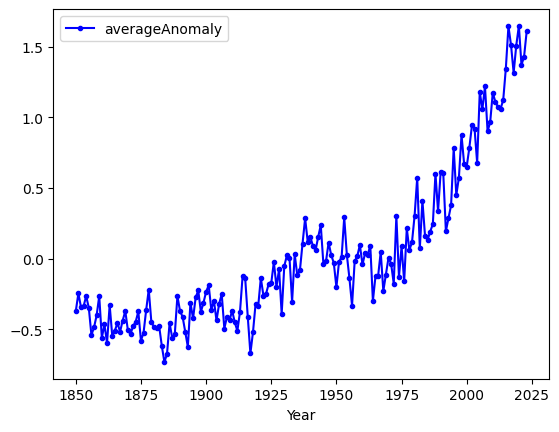

In [201]:
data_land_mean_temperatures.plot(x='Year', y='averageAnomaly', kind='line', marker='.', linestyle='-', color='b')

##### 2. Températures maritimes. 

Ce sont les températures mesurées au niveau des océans.

In [202]:
data_ocean_temperatures = pd.read_csv("data_ocean_temperatures.csv", skiprows=4)
data_ocean_temperatures

,Year,Anomaly
0,185001,-0.10
1,185002,-0.07
2,185003,-0.12
3,185004,-0.08
4,185005,-0.07
...,...,...
2080,202305,0.84
2081,202306,0.92
2082,202307,1.00
2083,202308,1.03


In [203]:
data_ocean_temperatures['Year'] = data_ocean_temperatures['Year'].astype(str)
data_ocean_temperatures['Month'] = data_ocean_temperatures['Year'].str.slice(start = -2).astype(int)
data_ocean_temperatures['Year'] = data_ocean_temperatures['Year'].str.slice(stop=-2).astype(int)

data_ocean_temperatures = data_ocean_temperatures[['Year', 'Month', 'Anomaly']]
print(f"Nombre de valeurs manquantes : {data_ocean_temperatures['Month'].isna().sum()}")

Nombre de valeurs manquantes : 0


In [204]:
data_ocean_mean_temperatures = data_ocean_temperatures.groupby('Year')['Anomaly'].mean().reset_index()
data_ocean_mean_temperatures = data_ocean_mean_temperatures.rename(columns={'Anomaly': 'averageAnomaly'})

data_ocean_mean_temperatures

,Year,averageAnomaly
0,1850,-0.058333
1,1851,0.003333
2,1852,0.027500
3,1853,0.009167
4,1854,-0.016667
...,...,...
169,2019,0.738333
170,2020,0.725000
171,2021,0.630833
172,2022,0.669167


<AxesSubplot:xlabel='Year'>

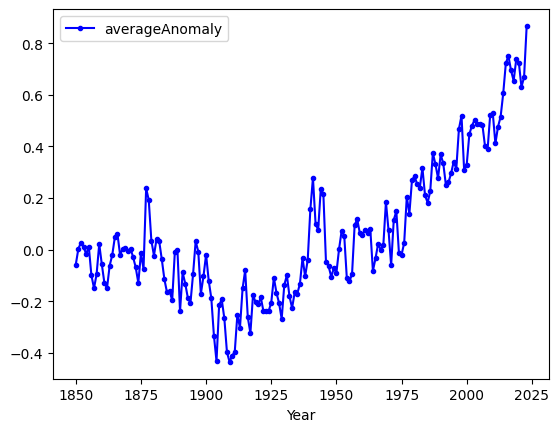

In [205]:
data_ocean_mean_temperatures.plot(x='Year', y='averageAnomaly', kind='line', marker='.', linestyle='-', color='b')

##### 3. Températures globales

In [206]:
data_global_temperatures = pd.read_csv("global_land_ocean_temperatures.csv", skiprows=4)
data_global_temperatures

,Year,Anomaly
0,185001,-0.37
1,185002,-0.12
2,185003,-0.23
3,185004,-0.19
4,185005,-0.19
...,...,...
2080,202305,0.95
2081,202306,1.06
2082,202307,1.13
2083,202308,1.22


In [207]:
data_global_temperatures['Year'] = data_global_temperatures['Year'].astype(str)
data_global_temperatures['Month'] = data_global_temperatures['Year'].str.slice(start = -2).astype(int)
data_global_temperatures['Year'] = data_global_temperatures['Year'].str.slice(stop=-2).astype(int)

data_global_temperatures = data_global_temperatures[['Year', 'Month', 'Anomaly']]
print(f"Nombre de valeurs manquantes : {data_global_temperatures['Month'].isna().sum()}")

Nombre de valeurs manquantes : 0


In [208]:
data_global_mean_temperatures = data_global_temperatures.groupby('Year')['Anomaly'].mean().reset_index()
data_global_mean_temperatures = data_global_mean_temperatures.rename(columns={'Anomaly': 'averageAnomaly'})

data_global_mean_temperatures

,Year,averageAnomaly
0,1850,-0.156667
1,1851,-0.074167
2,1852,-0.085833
3,1853,-0.096667
4,1854,-0.091667
...,...,...
169,2019,0.978333
170,2020,1.010833
171,2021,0.860000
172,2022,0.905833


<AxesSubplot:xlabel='Year'>

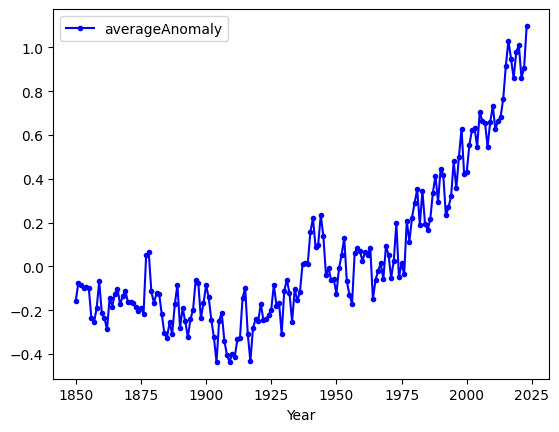

In [209]:
data_global_mean_temperatures.plot(x='Year', y='averageAnomaly', kind='line', marker='.', linestyle='-', color='b')

### Nous allons merger toutes les dataframes pour obtenir toutes les températures dans un seul dataframe

In [210]:
data_mean_temperatures = data_ocean_mean_temperatures.merge(data_land_mean_temperatures, on="Year", how="inner",suffixes=("-ocean","-land")).merge(data_global_mean_temperatures, on="Year", how="inner").rename(columns={'averageAnomaly':'averageAnomaly-global'})
data_mean_temperatures

,Year,averageAnomaly-ocean,averageAnomaly-land,averageAnomaly-global
0,1850,-0.058333,-0.373333,-0.156667
1,1851,0.003333,-0.246667,-0.074167
2,1852,0.027500,-0.343333,-0.085833
3,1853,0.009167,-0.336667,-0.096667
4,1854,-0.016667,-0.265833,-0.091667
...,...,...,...,...
169,2019,0.738333,1.508333,0.978333
170,2020,0.725000,1.647500,1.010833
171,2021,0.630833,1.371667,0.860000
172,2022,0.669167,1.430000,0.905833


In [211]:
data_mean_temperatures.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 0 to 173
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   174 non-null    int64  
 1   averageAnomaly-ocean   174 non-null    float64
 2   averageAnomaly-land    174 non-null    float64
 3   averageAnomaly-global  174 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 6.8 KB


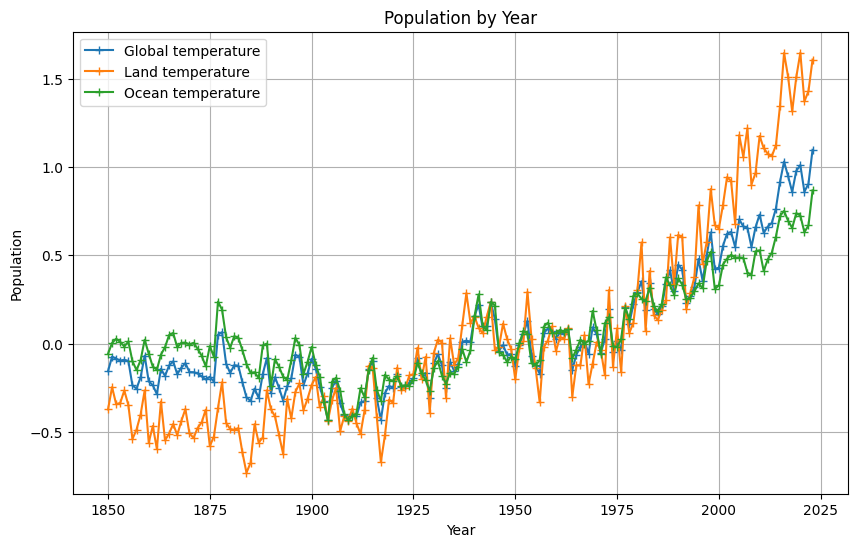

In [212]:
plt.figure(figsize=(10, 6))
plt.plot(data_mean_temperatures['Year'], data_mean_temperatures['averageAnomaly-global'], marker='+', label='Global temperature')
plt.plot(data_mean_temperatures['Year'], data_mean_temperatures['averageAnomaly-land'], marker='+', label='Land temperature')
plt.plot(data_mean_temperatures['Year'], data_mean_temperatures['averageAnomaly-ocean'], marker='+', label='Ocean temperature')

# Configuration du graphique
plt.title('Population by Year')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)

# Affichage du graphique
plt.show()

## C. Populations mondiales, répartitions rurales/urbaines mondiales

Il s'agit du facteur démographique de notre projet. Nous pouvons récupérer les répartitions rurales et urbaines pour chaque pays entre 1950 et 2021. Nous avons récupéré les données sur le site FAO(Food and Agriculture Organization) des Nations Unies : https://www.fao.org/faostat/en/#data/OA. 
A partir des données pour chaque pays, nous appliquer des méthodes pour créer des valeurs mondiales et pouvoir mieux les utiliser dans nos futurs modèles. 

Fichier csv :
- "FAOSTAT_data_en_10-21-2023.csv"

### Si on observe les données en détail surtout pour la plage d'années 1950-1960 et 2010-2021, on peut remarquer des anomalies. Les données sont beaucoup plus grandes que la réalité. Par exemple pour l'année 2021 il y +9 milliards d'habitants. Avec des recherches nous avons trouvé pourquoi. Le site disposait des données de 1960 à 2010. Ils sont fait un modèle de prédiction et ont prédit les données pour la plage d'années 1950-1960 et 2010-2021. Lors de la conception de nos modèles, il faudra prendre en compte ces incertitudes dûes au modèle utilisé par le site.

In [213]:
data_population = pd.read_csv("FAOSTAT_data_en_10-21-2023.csv")
data_population.columns

Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value',
       'Flag', 'Flag Description', 'Note'],
      dtype='object')

In [214]:
data_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46729 entries, 0 to 46728
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       46729 non-null  object 
 1   Domain            46729 non-null  object 
 2   Area Code (M49)   46729 non-null  int64  
 3   Area              46729 non-null  object 
 4   Element Code      46729 non-null  int64  
 5   Element           46729 non-null  object 
 6   Item Code         46729 non-null  int64  
 7   Item              46729 non-null  object 
 8   Year Code         46729 non-null  int64  
 9   Year              46729 non-null  int64  
 10  Unit              46729 non-null  object 
 11  Value             46729 non-null  float64
 12  Flag              46729 non-null  object 
 13  Flag Description  46729 non-null  object 
 14  Note              0 non-null      float64
dtypes: float64(2), int64(5), object(8)
memory usage: 5.3+ MB


In [215]:
data_population.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,OA,Annual population,4,Afghanistan,511,Total Population - Both sexes,3010,Population - Est. & Proj.,1950,1950,1000 No,7480.461,X,Figure from international organizations,NaN
1,OA,Annual population,4,Afghanistan,551,Rural population,3010,Population - Est. & Proj.,1950,1950,1000 No,7286.991,X,Figure from international organizations,NaN
2,OA,Annual population,4,Afghanistan,561,Urban population,3010,Population - Est. & Proj.,1950,1950,1000 No,465.127,X,Figure from international organizations,NaN
3,OA,Annual population,4,Afghanistan,511,Total Population - Both sexes,3010,Population - Est. & Proj.,1951,1951,1000 No,7571.537,X,Figure from international organizations,NaN
4,OA,Annual population,4,Afghanistan,551,Rural population,3010,Population - Est. & Proj.,1951,1951,1000 No,7352.856,X,Figure from international organizations,NaN


Nous avons dropé les colonnes qui ne nous servent pas à grand chose.

In [216]:
columns_to_drop = ['Domain Code', 'Domain', 'Area Code (M49)', 'Element Code', 'Item Code','Item' ,'Year Code', 'Unit', 'Flag', 'Flag Description', 'Note']
data_population = data_population.drop(columns=columns_to_drop)

In [217]:
data_population.head()

,Area,Element,Year,Value
0,Afghanistan,Total Population - Both sexes,1950,7480.461
1,Afghanistan,Rural population,1950,7286.991
2,Afghanistan,Urban population,1950,465.127
3,Afghanistan,Total Population - Both sexes,1951,7571.537
4,Afghanistan,Rural population,1951,7352.856


Le format de notre dataframe n'est pas adapté pour l'utilisation dans un modèle. 

Nous avons envisagé plusieurs solutions. Nous avons choisi d'utiliser la fonction groupby() de pandas avec la fonction sum() pour regrouper toutes les données par pays et construire des données mondiales. 

In [218]:
data_population_world = data_population.groupby(['Year', 'Element'], as_index=False).sum()



data_population_world

,Year,Element,Value
0,1950,Rural population,2280229.823
1,1950,Total Population - Both sexes,3052233.343
2,1950,Urban population,820258.014
3,1951,Rural population,2314969.612
4,1951,Total Population - Both sexes,3106064.189
...,...,...,...
211,2020,Total Population - Both sexes,9296039.555
212,2020,Urban population,5281071.704
213,2021,Rural population,3957486.848
214,2021,Total Population - Both sexes,9365395.016


En utilisant cette méthode nous nous retrouvons avec la colonne 'Year' qui se répète 3 fois. Une fois pour chaque valeur de Element. Ce n'est pas encore suffisant. Il faudrait transformer les valeurs de la colonne 'Elemnent' en colonnes et les valeurs dans 'Value' deviendront les valeurs associées. 

Nous avons utilisé la fonction pivot, pour transformer notre dataframe en pivot table.

In [219]:
data_population_world = data_population_world.pivot(index=['Year'], columns='Element', values='Value').reset_index()
data_population_world.columns.name = None

data_population_world.head()

,Year,Rural population,Total Population - Both sexes,Urban population
0,1950,2280229.823,3052233.343,820258.014
1,1951,2314969.612,3106064.189,848615.115
2,1952,2346274.223,3164936.679,876864.771
3,1953,2374872.565,3227766.777,905829.315
4,1954,2401878.756,3292431.502,935690.068


La noouvelle colonne 'Total Population - Both sexes' ne correspond pas à la somme des colonnes 'Urban population' et 'Rural population'. Nous avons drop la colonne et avons créé la nouvelle colonne 'Total population' comme la somme des deux.

In [220]:
data_population_world = data_population_world.drop(columns='Total Population - Both sexes')
data_population_world['Total population'] = data_population_world['Urban population'] + data_population_world['Rural population']

data_population_world

,Year,Rural population,Urban population,Total population
0,1950,2280229.823,820258.014,3100487.837
1,1951,2314969.612,848615.115,3163584.727
2,1952,2346274.223,876864.771,3223138.994
3,1953,2374872.565,905829.315,3280701.880
4,1954,2401878.756,935690.068,3337568.824
...,...,...,...,...
67,2017,4007890.027,4983503.377,8991393.404
68,2018,3996201.638,5083419.009,9079620.647
69,2019,3983886.503,5182643.555,9166530.058
70,2020,3970976.303,5281071.704,9252048.007


#### Graphe de l'évolution des populations rurals et urbaines dans le monde

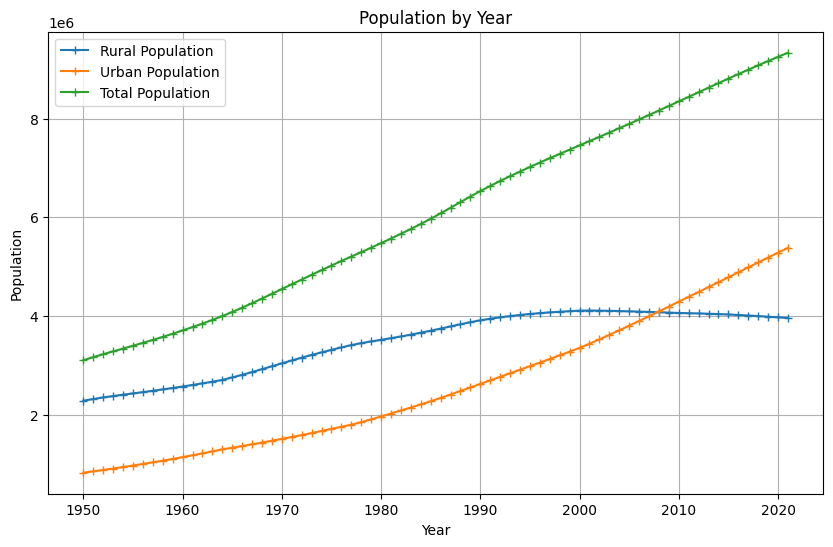

In [221]:
plt.figure(figsize=(10, 6))
plt.plot(data_population_world['Year'], data_population_world['Rural population'], marker='+', label='Rural Population')
plt.plot(data_population_world['Year'], data_population_world['Urban population'], marker='+', label='Urban Population')
plt.plot(data_population_world['Year'], data_population_world['Total population'], marker='+', label='Total Population')

# Configuration du graphique
plt.title('Population by Year')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)

# Affichage du graphique
plt.show()

## D. Emissions totales des ghg en fonction des différents secteurs.

Fichier csv :

- 'Emissions_Totals_E_All_Data_NOFLAG.csv'



In [222]:
data_test = pd.read_csv('Emissions_Totals_E_All_Data_NOFLAG.csv', encoding='ISO-8859-1')
data_test.head()

,Area Code,Area Code (M49),Area,Item Code,Item,Element Code,Element,Source Code,Source,Unit,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2030,Y2050
0,2,'004,Afghanistan,5064,Crop Residues,7234,Direct emissions (N2O),3050,FAO TIER 1,kilotonnes,...,1.4018,1.4584,1.2424,1.1940,1.0617,0.8988,1.2176,1.3170,1.5337,1.9389
1,2,'004,Afghanistan,5064,Crop Residues,7236,Indirect emissions (N2O),3050,FAO TIER 1,kilotonnes,...,0.3154,0.3281,0.2795,0.2687,0.2389,0.2022,0.2740,0.2963,0.3451,0.4362
2,2,'004,Afghanistan,5064,Crop Residues,7230,Emissions (N2O),3050,FAO TIER 1,kilotonnes,...,1.7173,1.7865,1.5220,1.4627,1.3005,1.1011,1.4916,1.6133,1.8788,2.3751
3,2,'004,Afghanistan,5064,Crop Residues,724313,Emissions (CO2eq) from N2O (AR5),3050,FAO TIER 1,kilotonnes,...,455.0727,473.4174,403.3181,387.6130,344.6447,291.7838,395.2689,427.5284,497.8929,629.4047
4,2,'004,Afghanistan,5064,Crop Residues,723113,Emissions (CO2eq) (AR5),3050,FAO TIER 1,kilotonnes,...,455.0727,473.4174,403.3181,387.6130,344.6447,291.7838,395.2689,427.5284,497.8929,629.4047


In [223]:
data_test = data_test.drop(columns=[col for col in data_test.columns if 'Code' in col])
data_test = data_test.drop(columns=['Unit','Y2030','Y2050'])

In [224]:
data_test.head()

,Area,Item,Element,Source,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,...,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020
0,Afghanistan,Crop Residues,Direct emissions (N2O),FAO TIER 1,0.8762,0.8829,0.8236,0.8882,0.8978,0.8466,...,1.0321,1.3726,1.4018,1.4584,1.2424,1.1940,1.0617,0.8988,1.2176,1.3170
1,Afghanistan,Crop Residues,Indirect emissions (N2O),FAO TIER 1,0.1972,0.1987,0.1853,0.1998,0.2020,0.1905,...,0.2322,0.3088,0.3154,0.3281,0.2795,0.2687,0.2389,0.2022,0.2740,0.2963
2,Afghanistan,Crop Residues,Emissions (N2O),FAO TIER 1,1.0734,1.0816,1.0089,1.0880,1.0998,1.0371,...,1.2643,1.6815,1.7173,1.7865,1.5220,1.4627,1.3005,1.1011,1.4916,1.6133
3,Afghanistan,Crop Residues,Emissions (CO2eq) from N2O (AR5),FAO TIER 1,284.4486,286.6192,267.3466,288.3212,291.4406,274.8304,...,335.0379,445.5958,455.0727,473.4174,403.3181,387.6130,344.6447,291.7838,395.2689,427.5284
4,Afghanistan,Crop Residues,Emissions (CO2eq) (AR5),FAO TIER 1,284.4486,286.6192,267.3466,288.3212,291.4406,274.8304,...,335.0379,445.5958,455.0727,473.4174,403.3181,387.6130,344.6447,291.7838,395.2689,427.5284


In [225]:
print(data_test.Element.unique())

['Direct emissions (N2O)' 'Indirect emissions (N2O)' 'Emissions (N2O)'
 'Emissions (CO2eq) from N2O (AR5)' 'Emissions (CO2eq) (AR5)'
 'Emissions (CH4)' 'Emissions (CO2eq) from CH4 (AR5)' 'Emissions (CO2)'
 'Emissions (CO2eq) from F-gases (AR5)']


In [226]:
# On supprime les lignes avec la valeur 'UNFCCC' dans la colonne 'Source'
data_test = data_test[data_test['Source'] != 'UNFCCC'].drop(columns=['Source'])

In [227]:
data_test.head()

,Area,Item,Element,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,...,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020
0,Afghanistan,Crop Residues,Direct emissions (N2O),0.8762,0.8829,0.8236,0.8882,0.8978,0.8466,0.8783,...,1.0321,1.3726,1.4018,1.4584,1.2424,1.1940,1.0617,0.8988,1.2176,1.3170
1,Afghanistan,Crop Residues,Indirect emissions (N2O),0.1972,0.1987,0.1853,0.1998,0.2020,0.1905,0.1976,...,0.2322,0.3088,0.3154,0.3281,0.2795,0.2687,0.2389,0.2022,0.2740,0.2963
2,Afghanistan,Crop Residues,Emissions (N2O),1.0734,1.0816,1.0089,1.0880,1.0998,1.0371,1.0759,...,1.2643,1.6815,1.7173,1.7865,1.5220,1.4627,1.3005,1.1011,1.4916,1.6133
3,Afghanistan,Crop Residues,Emissions (CO2eq) from N2O (AR5),284.4486,286.6192,267.3466,288.3212,291.4406,274.8304,285.1026,...,335.0379,445.5958,455.0727,473.4174,403.3181,387.6130,344.6447,291.7838,395.2689,427.5284
4,Afghanistan,Crop Residues,Emissions (CO2eq) (AR5),284.4486,286.6192,267.3466,288.3212,291.4406,274.8304,285.1026,...,335.0379,445.5958,455.0727,473.4174,403.3181,387.6130,344.6447,291.7838,395.2689,427.5284


In [228]:
import warnings
warnings.filterwarnings("ignore")

melted_data = pd.melt(data_test, id_vars=['Area', 'Item', 'Element'], var_name='Year', value_name='Emissions')
melted_data['Category'] = melted_data[['Item', 'Element', 'Area']].apply(lambda x: ' - '.join(x), axis=1)
melted_data = melted_data.drop(columns=['Area','Item','Element'])

# L'unité des émissions est le kilotonnes, on le transforme en kilogrammes.
melted_data['Emissions'] = melted_data['Emissions'] * 1000000
melted_data['Year'] = melted_data['Year'].str.extract('(\d+)').astype(int)


In [229]:
melted_data

,Year,Emissions,Category
0,1961,8.762000e+05,Crop Residues - Direct emissions (N2O) - Afgha...
1,1961,1.972000e+05,Crop Residues - Indirect emissions (N2O) - Afg...
2,1961,1.073400e+06,Crop Residues - Emissions (N2O) - Afghanistan
3,1961,2.844486e+08,Crop Residues - Emissions (CO2eq) from N2O (AR...
4,1961,2.844486e+08,Crop Residues - Emissions (CO2eq) (AR5) - Afgh...
...,...,...,...
3231175,2020,1.088919e+13,All sectors without LULUCF - Emissions (CO2) -...
3231176,2020,9.208261e+11,All sectors without LULUCF - Emissions (CO2eq)...
3231177,2020,1.825476e+12,All sectors without LULUCF - Emissions (CO2eq)...
3231178,2020,8.009744e+11,All sectors without LULUCF - Emissions (CO2eq)...


In [230]:
# Utilisez la méthode pivot pour obtenir la table pivot
pivot_table = melted_data.pivot(index='Year', columns='Category', values='Emissions')

# Réinitialisez l'index et donnez un nom à l'index et aux colonnes
pivot_table.reset_index(inplace=True)
pivot_table.columns.name = None

In [231]:
pivot_table.head()

,Year,AFOLU - Emissions (CH4) - Afghanistan,AFOLU - Emissions (CH4) - Africa,AFOLU - Emissions (CH4) - Albania,AFOLU - Emissions (CH4) - Algeria,AFOLU - Emissions (CH4) - American Samoa,AFOLU - Emissions (CH4) - Americas,AFOLU - Emissions (CH4) - Andorra,AFOLU - Emissions (CH4) - Angola,AFOLU - Emissions (CH4) - Anguilla,...,Waste - Emissions (N2O) - Venezuela (Bolivarian Republic of),Waste - Emissions (N2O) - Viet Nam,Waste - Emissions (N2O) - Western Africa,Waste - Emissions (N2O) - Western Asia,Waste - Emissions (N2O) - Western Europe,Waste - Emissions (N2O) - World,Waste - Emissions (N2O) - Yemen,Waste - Emissions (N2O) - Yugoslav SFR,Waste - Emissions (N2O) - Zambia,Waste - Emissions (N2O) - Zimbabwe
0,1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### On ne récupère que les valeurs pour la zone géographique "World" (Monde)

In [232]:
pivot_table_world = pivot_table[[col for col in pivot_table.columns if 'World' in col or 'Year' in col]]
print(f"Nombre de valeurs manquantes : {pivot_table_world.isna().sum().sum()}")

Nombre de valeurs manquantes : 5249


In [233]:
pivot_table_world

,Year,AFOLU - Emissions (CH4) - World,AFOLU - Emissions (CO2) - World,AFOLU - Emissions (CO2eq) (AR5) - World,AFOLU - Emissions (CO2eq) from CH4 (AR5) - World,AFOLU - Emissions (CO2eq) from N2O (AR5) - World,AFOLU - Emissions (N2O) - World,Agricultural Soils - Direct emissions (N2O) - World,Agricultural Soils - Emissions (CO2eq) (AR5) - World,Agricultural Soils - Emissions (CO2eq) from N2O (AR5) - World,...,Synthetic Fertilizers - Emissions (CO2eq) (AR5) - World,Synthetic Fertilizers - Emissions (CO2eq) from N2O (AR5) - World,Synthetic Fertilizers - Emissions (N2O) - World,Synthetic Fertilizers - Indirect emissions (N2O) - World,Waste - Emissions (CH4) - World,Waste - Emissions (CO2) - World,Waste - Emissions (CO2eq) (AR5) - World,Waste - Emissions (CO2eq) from CH4 (AR5) - World,Waste - Emissions (CO2eq) from N2O (AR5) - World,Waste - Emissions (N2O) - World
0,1961,NaN,NaN,NaN,NaN,NaN,NaN,1.842093e+09,6.337327e+11,6.337327e+11,...,6.320945e+10,6.320945e+10,2.385262e+08,58506400.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1962,NaN,NaN,NaN,NaN,NaN,NaN,1.898113e+09,6.529806e+11,6.529806e+11,...,7.133256e+10,7.133256e+10,2.691795e+08,66025200.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1963,NaN,NaN,NaN,NaN,NaN,NaN,1.944163e+09,6.688706e+11,6.688706e+11,...,8.053092e+10,8.053092e+10,3.038903e+08,74539100.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1964,NaN,NaN,NaN,NaN,NaN,NaN,2.006306e+09,6.898036e+11,6.898036e+11,...,9.024583e+10,9.024583e+10,3.405503e+08,83531200.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1965,NaN,NaN,NaN,NaN,NaN,NaN,2.078881e+09,7.149625e+11,7.149625e+11,...,1.040795e+11,1.040795e+11,3.927527e+08,96335600.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1966,NaN,NaN,NaN,NaN,NaN,NaN,2.171806e+09,7.468719e+11,7.468719e+11,...,1.211145e+11,1.211145e+11,4.570359e+08,112103100.0,NaN,NaN,NaN,NaN,NaN,NaN
6,1967,NaN,NaN,NaN,NaN,NaN,NaN,2.246194e+09,7.725187e+11,7.725187e+11,...,1.321892e+11,1.321892e+11,4.988272e+08,122353800.0,NaN,NaN,NaN,NaN,NaN,NaN
7,1968,NaN,NaN,NaN,NaN,NaN,NaN,2.317671e+09,7.970134e+11,7.970134e+11,...,1.444578e+11,1.444578e+11,5.451237e+08,133709600.0,NaN,NaN,NaN,NaN,NaN,NaN
8,1969,NaN,NaN,NaN,NaN,NaN,NaN,2.364691e+09,8.132686e+11,8.132686e+11,...,1.561468e+11,1.561468e+11,5.892332e+08,144528900.0,NaN,NaN,NaN,NaN,NaN,NaN
9,1970,NaN,NaN,NaN,NaN,NaN,NaN,2.435059e+09,8.374557e+11,8.374557e+11,...,1.740685e+11,1.740685e+11,6.568623e+08,161117200.0,NaN,NaN,NaN,NaN,NaN,NaN


### Remplissage des valeurs manquantes avec une méthode d'imputation de la librairie python de Sklearn

In [234]:
imputer = IterativeImputer()

imputer.fit(pivot_table_world.iloc[:,1:])
pivot_table_world_imputed = imputer.transform(pivot_table_world.iloc[:,1:])

In [235]:
pivot_table_world_imputed

array([[1.07051701e+11, 1.44369038e+12, 5.13077538e+12, ...,
        2.14974040e+12, 4.41332897e+10, 2.17540684e+08],
       [1.08574798e+11, 1.43378840e+12, 5.18557131e+12, ...,
        2.14205864e+12, 4.41098359e+10, 2.18110812e+08],
       [1.09209152e+11, 1.42930122e+12, 5.21624195e+12, ...,
        2.13614538e+12, 4.41026464e+10, 2.19369310e+08],
       ...,
       [1.45545360e+11, 1.29492871e+12, 7.47882320e+12, ...,
        2.26503449e+12, 1.11074058e+11, 4.19147400e+08],
       [1.48220712e+11, 1.47172785e+12, 7.75360933e+12, ...,
        2.28957115e+12, 1.13733159e+11, 4.29181700e+08],
       [1.45836875e+11, 1.17268851e+12, 7.42510774e+12, ...,
        2.31920575e+12, 1.15421436e+11, 4.35552600e+08]])

In [236]:
pivot_table_world_imputed = pd.DataFrame(pivot_table_world_imputed)

In [237]:
pivot_table_world_imputed.index = pd.to_datetime(pivot_table_world['Year'], format='%Y')

pivot_table_world_imputed.columns =  pivot_table_world.drop(columns = ['Year']).columns

In [238]:
pivot_table_world_imputed

,AFOLU - Emissions (CH4) - World,AFOLU - Emissions (CO2) - World,AFOLU - Emissions (CO2eq) (AR5) - World,AFOLU - Emissions (CO2eq) from CH4 (AR5) - World,AFOLU - Emissions (CO2eq) from N2O (AR5) - World,AFOLU - Emissions (N2O) - World,Agricultural Soils - Direct emissions (N2O) - World,Agricultural Soils - Emissions (CO2eq) (AR5) - World,Agricultural Soils - Emissions (CO2eq) from N2O (AR5) - World,Agricultural Soils - Emissions (N2O) - World,...,Synthetic Fertilizers - Emissions (CO2eq) (AR5) - World,Synthetic Fertilizers - Emissions (CO2eq) from N2O (AR5) - World,Synthetic Fertilizers - Emissions (N2O) - World,Synthetic Fertilizers - Indirect emissions (N2O) - World,Waste - Emissions (CH4) - World,Waste - Emissions (CO2) - World,Waste - Emissions (CO2eq) (AR5) - World,Waste - Emissions (CO2eq) from CH4 (AR5) - World,Waste - Emissions (CO2eq) from N2O (AR5) - World,Waste - Emissions (N2O) - World
Year,,,,,,,,,,,,,,,,,,,,,
1961-01-01,1.070517e+11,1.443690e+12,5.130775e+12,3.000029e+12,6.897248e+11,2.602734e+09,1.842093e+09,6.337327e+11,6.337327e+11,2.391444e+09,...,6.320945e+10,6.320945e+10,2.385262e+08,58506400.0,7.729039e+10,9.756879e+09,2.186609e+12,2.149740e+12,4.413329e+10,2.175407e+08
1962-01-01,1.085748e+11,1.433788e+12,5.185571e+12,3.042836e+12,7.117056e+11,2.685681e+09,1.898113e+09,6.529806e+11,6.529806e+11,2.464078e+09,...,7.133256e+10,7.133256e+10,2.691795e+08,66025200.0,7.701481e+10,9.485970e+09,2.177765e+12,2.142059e+12,4.410984e+10,2.181108e+08
1963-01-01,1.092092e+11,1.429301e+12,5.216242e+12,3.060648e+12,7.290818e+11,2.751251e+09,1.944163e+09,6.688706e+11,6.688706e+11,2.524040e+09,...,8.053092e+10,8.053092e+10,3.038903e+08,74539100.0,7.680581e+10,9.338783e+09,2.171864e+12,2.136145e+12,4.410265e+10,2.193693e+08
1964-01-01,1.106227e+11,1.420913e+12,5.269168e+12,3.100351e+12,7.507622e+11,2.833064e+09,2.006306e+09,6.898036e+11,6.898036e+11,2.603032e+09,...,9.024583e+10,9.024583e+10,3.405503e+08,83531200.0,7.634231e+10,9.075387e+09,2.158008e+12,2.122967e+12,4.401391e+10,2.204218e+08
1965-01-01,1.116736e+11,1.413851e+12,5.319128e+12,3.129847e+12,7.783331e+11,2.937105e+09,2.078881e+09,7.149625e+11,7.149625e+11,2.697972e+09,...,1.040795e+11,1.040795e+11,3.927527e+08,96335600.0,7.598886e+10,8.830320e+09,2.147931e+12,2.112973e+12,4.399356e+10,2.224279e+08
1966-01-01,1.132153e+11,1.403540e+12,5.385412e+12,3.173161e+12,8.116959e+11,3.063003e+09,2.171806e+09,7.468719e+11,7.468719e+11,2.818385e+09,...,1.211145e+11,1.211145e+11,4.570359e+08,112103100.0,7.549649e+10,8.487309e+09,2.133776e+12,2.098963e+12,4.384661e+10,2.243720e+08
1967-01-01,1.147136e+11,1.393371e+12,5.447154e+12,3.215253e+12,8.415976e+11,3.175839e+09,2.246194e+09,7.725187e+11,7.725187e+11,2.915165e+09,...,1.321892e+11,1.321892e+11,4.988272e+08,122353800.0,7.520546e+10,8.180588e+09,2.124720e+12,2.090887e+12,4.386962e+10,2.256679e+08
1968-01-01,1.159254e+11,1.385453e+12,5.498962e+12,3.249289e+12,8.673488e+11,3.273014e+09,2.317671e+09,7.970134e+11,7.970134e+11,3.007598e+09,...,1.444578e+11,1.444578e+11,5.451237e+08,133709600.0,7.482278e+10,7.929824e+09,2.113410e+12,2.080062e+12,4.387106e+10,2.269491e+08
1969-01-01,1.163524e+11,1.382268e+12,5.523088e+12,3.261273e+12,8.826950e+11,3.330924e+09,2.364691e+09,8.132686e+11,8.132686e+11,3.068938e+09,...,1.561468e+11,1.561468e+11,5.892332e+08,144528900.0,7.457169e+10,7.839660e+09,2.106468e+12,2.072898e+12,4.394561e+10,2.280722e+08


# Prédictions sur les températures globales, terrestres et maritimes

Utilisation d'un modèle ARIMA

In [239]:
data_mean_temperatures['Year']

0      1850
1      1851
2      1852
3      1853
4      1854
       ... 
169    2019
170    2020
171    2021
172    2022
173    2023
Name: Year, Length: 174, dtype: int64

<AxesSubplot:xlabel='Year'>

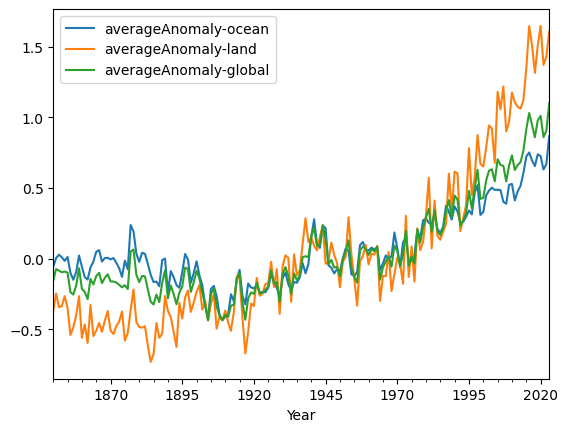

In [240]:
data_mean_temperatures['Year'] = pd.to_datetime(data_mean_temperatures['Year'], format='%Y')
data_mean_temperatures.set_index('Year', inplace=True)

data_mean_temperatures.plot()

In [241]:
data_mean_temperatures

,averageAnomaly-ocean,averageAnomaly-land,averageAnomaly-global
Year,,,
1850-01-01,-0.058333,-0.373333,-0.156667
1851-01-01,0.003333,-0.246667,-0.074167
1852-01-01,0.027500,-0.343333,-0.085833
1853-01-01,0.009167,-0.336667,-0.096667
1854-01-01,-0.016667,-0.265833,-0.091667
...,...,...,...
2019-01-01,0.738333,1.508333,0.978333
2020-01-01,0.725000,1.647500,1.010833
2021-01-01,0.630833,1.371667,0.860000


In [242]:
serie_temporelle = data_mean_temperatures[['averageAnomaly-global']]

In [243]:
data_population_world['Year'] = pd.to_datetime(data_population_world['Year'], format='%Y')
data_population_world.set_index('Year', inplace=True)

data_population_world

,Rural population,Urban population,Total population
Year,,,
1950-01-01,2280229.823,820258.014,3100487.837
1951-01-01,2314969.612,848615.115,3163584.727
1952-01-01,2346274.223,876864.771,3223138.994
1953-01-01,2374872.565,905829.315,3280701.880
1954-01-01,2401878.756,935690.068,3337568.824
...,...,...,...
2017-01-01,4007890.027,4983503.377,8991393.404
2018-01-01,3996201.638,5083419.009,9079620.647
2019-01-01,3983886.503,5182643.555,9166530.058


In [244]:
data_mean_temperatures_reset = data_mean_temperatures.reset_index()
data_population_world_reset = data_population_world.reset_index()

merged_df = pd.merge(data_mean_temperatures_reset, data_population_world_reset, on='Year')


merged_df['Year'] = pd.to_datetime(merged_df['Year'], format='%Y')
merged_df.set_index('Year', inplace=True)
merged_df

,averageAnomaly-ocean,averageAnomaly-land,averageAnomaly-global,Rural population,Urban population,Total population
Year,,,,,,
1950-01-01,-0.090000,-0.202500,-0.125000,2280229.823,820258.014,3100487.837
1951-01-01,0.000833,-0.023333,-0.008333,2314969.612,848615.115,3163584.727
1952-01-01,0.072500,0.011667,0.053333,2346274.223,876864.771,3223138.994
1953-01-01,0.054167,0.292500,0.129167,2374872.565,905829.315,3280701.880
1954-01-01,-0.111667,0.027500,-0.068333,2401878.756,935690.068,3337568.824
...,...,...,...,...,...,...
2017-01-01,0.695000,1.510833,0.947500,4007890.027,4983503.377,8991393.404
2018-01-01,0.655000,1.315000,0.859167,3996201.638,5083419.009,9079620.647
2019-01-01,0.738333,1.508333,0.978333,3983886.503,5182643.555,9166530.058


In [355]:
data_GHG_merged['Year'] = pd.to_datetime(data_GHG_merged['Year'], format='%Y')
data_GHG_merged.set_index('Year', inplace=True)

merged_df2 = pd.merge(merged_df, data_GHG_merged, on='Year')


In [356]:
merged_df2

,averageAnomaly-ocean,averageAnomaly-land,averageAnomaly-global,Rural population,Urban population,Total population,log-rural-population,log-urban-population,log-total-population,Agriculture-CO2,...,Total F\x2Dgases/cap-Fgases,Agriculture-GHG,Buildings-GHG,Fuel Exploitation-GHG,Industrial Combustion-GHG,Power Industry-GHG,Processes-GHG,Transport-GHG,Waste-GHG,Total GHG/cap-GHG
Year,,,,,,,,,,,,,,,,,,,,,
1970-01-01,0.074167,0.007500,0.053333,3037452.546,1506726.021,4544178.567,2.703140,2.655033,2.729770,49143283,...,0.041,4527024579,3267750060,3580583766,3765282857,3836212999,1487504437,2850810853,1182374868,6.62
1971-01-01,-0.060833,-0.037500,-0.052500,3096189.564,1544307.477,4640497.041,2.704422,2.656763,2.731137,49143283,...,0.043,4603746791,3274352007,3569137184,3531338339,3923671713,1507519552,2932491264,1240664064,6.51
1972-01-01,0.115000,-0.178333,0.025000,3153794.783,1583038.594,4736833.377,2.705655,2.658500,2.732475,49143283,...,0.044,4627571342,3395600889,3707517703,3622208700,4202551901,1594868499,3105699071,1265435934,6.63
1973-01-01,0.149167,0.302500,0.196667,3208551.405,1624093.534,4832644.939,2.706805,2.660292,2.733777,49143283,...,0.046,4687704237,3462800791,3984951580,3808901244,4539042350,1674351414,3285455339,1290652382,6.81
1974-01-01,-0.015000,-0.130000,-0.050000,3259907.143,1667478.823,4927385.966,2.707864,2.662134,2.735037,49900345,...,0.048,4749407357,3385552994,3950268813,3796048601,4618448085,1676517755,3255134990,1311005526,6.68
1975-01-01,-0.020000,0.085833,0.014167,3311379.098,1709363.485,5020742.583,2.708908,2.663864,2.736255,54512382,...,0.047,4839687913,3478419701,3811320321,3669622399,4710801644,1619481795,3340145208,1328975115,6.57
1976-01-01,0.025833,-0.161667,-0.034167,3360426.955,1752003.258,5112430.213,2.709887,2.665579,2.737427,57643820,...,0.049,4884446150,3611199837,3986383161,3838492290,5070616665,1724050847,3475505472,1359961508,6.73
1977-01-01,0.204167,0.214167,0.207500,3407906.143,1794782.589,5202688.732,2.710820,2.667256,2.738559,62076191,...,0.052,4921357219,3642929831,4024432242,4007891203,5292591565,1764588885,3598834182,1382484716,6.77
1978-01-01,0.139167,0.060000,0.113333,3448026.377,1844397.101,5292423.478,2.711598,2.669147,2.739664,66330257,...,0.053,4946801144,3753926784,4035223294,4060940234,5465628674,1819832126,3745729224,1410770867,6.79


In [245]:
merged_df['log-rural-population'] = np.log(np.log(merged_df['Rural population']))
merged_df['log-urban-population'] = np.log(np.log(merged_df['Urban population']))
merged_df['log-total-population'] = np.log(np.log(merged_df['Total population']))
merged_df

,averageAnomaly-ocean,averageAnomaly-land,averageAnomaly-global,Rural population,Urban population,Total population,log-rural-population,log-urban-population,log-total-population
Year,,,,,,,,,
1950-01-01,-0.090000,-0.202500,-0.125000,2280229.823,820258.014,3100487.837,2.683743,2.611346,2.704515
1951-01-01,0.000833,-0.023333,-0.008333,2314969.612,848615.115,3163584.727,2.684775,2.613839,2.705862
1952-01-01,0.072500,0.011667,0.053333,2346274.223,876864.771,3223138.994,2.685691,2.616235,2.707108
1953-01-01,0.054167,0.292500,0.129167,2374872.565,905829.315,3280701.880,2.686517,2.618607,2.708288
1954-01-01,-0.111667,0.027500,-0.068333,2401878.756,935690.068,3337568.824,2.687287,2.620969,2.709433
...,...,...,...,...,...,...,...,...,...
2017-01-01,0.695000,1.510833,0.947500,4007890.027,4983503.377,8991393.404,2.721544,2.735772,2.773325
2018-01-01,0.655000,1.315000,0.859167,3996201.638,5083419.009,9079620.647,2.721352,2.737058,2.773934
2019-01-01,0.738333,1.508333,0.978333,3983886.503,5182643.555,9166530.058,2.721149,2.738309,2.774529


In [357]:
from sklearn.preprocessing import MinMaxScaler




scaler = MinMaxScaler(feature_range=(0, 1))

data_scaled = pd.DataFrame(data_scaled, columns=merged_df2.columns, index=merged_df2.index)

taille_fenetre = 10  
X = []
y = []
for i in range(taille_fenetre, len(data_scaled)):
    X.append(data_scaled.iloc[i-taille_fenetre:i].values)
    y.append(data_scaled.iloc[i]['averageAnomaly-global'])

X = np.array(X)
y = np.array(y)


In [358]:
X.shape

(42, 10, 47)

In [307]:

split_index = int(0.5 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], -1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], -1))



In [334]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    X_train, 
    y_train, 
    epochs=10, 
    batch_size=32, 
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)


predictions = model.predict(X_test)





Epoch 1/10
1/1 [==============================] - 10s 10s/step - loss: 0.0830 - val_loss: 0.2279
Epoch 2/10
1/1 [==============================] - 0s 271ms/step - loss: 0.0386 - val_loss: 0.0973
Epoch 3/10
1/1 [==============================] - 0s 86ms/step - loss: 0.0134 - val_loss: 0.0299
Epoch 4/10
1/1 [==============================] - 0s 84ms/step - loss: 0.0058 - val_loss: 0.0133
Epoch 5/10
1/1 [==============================] - 0s 77ms/step - loss: 0.0113 - val_loss: 0.0196
Epoch 6/10
1/1 [==============================] - 0s 82ms/step - loss: 0.0197 - val_loss: 0.0230
Epoch 7/10
1/1 [==============================] - 1s 927ms/step


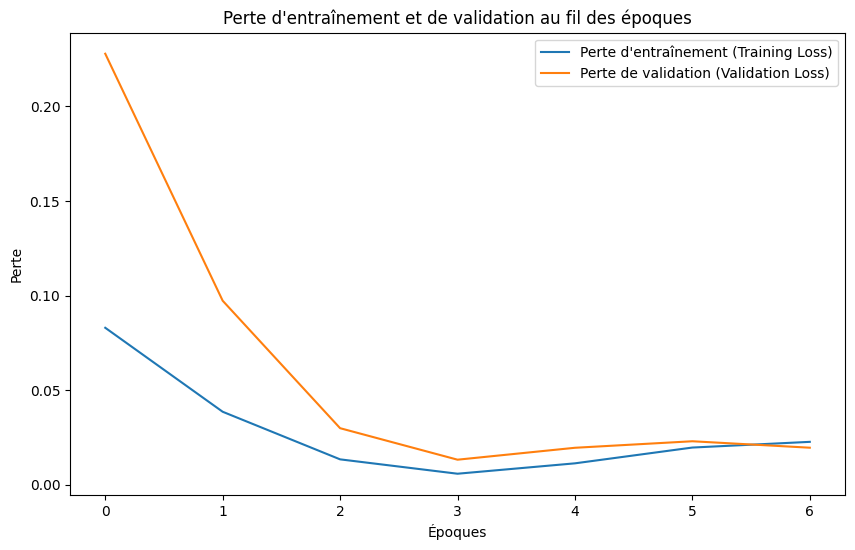

In [335]:


training_loss = history.history['loss']
validation_loss = history.history['val_loss']

plt.figure(figsize=(10, 6))
plt.plot(training_loss, label='Perte d\'entraînement (Training Loss)')
plt.plot(validation_loss, label='Perte de validation (Validation Loss)')
plt.title('Perte d\'entraînement et de validation au fil des époques')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()
plt.show()


RMSE: 0.11517629265148875
MAE: 0.09095455140675328


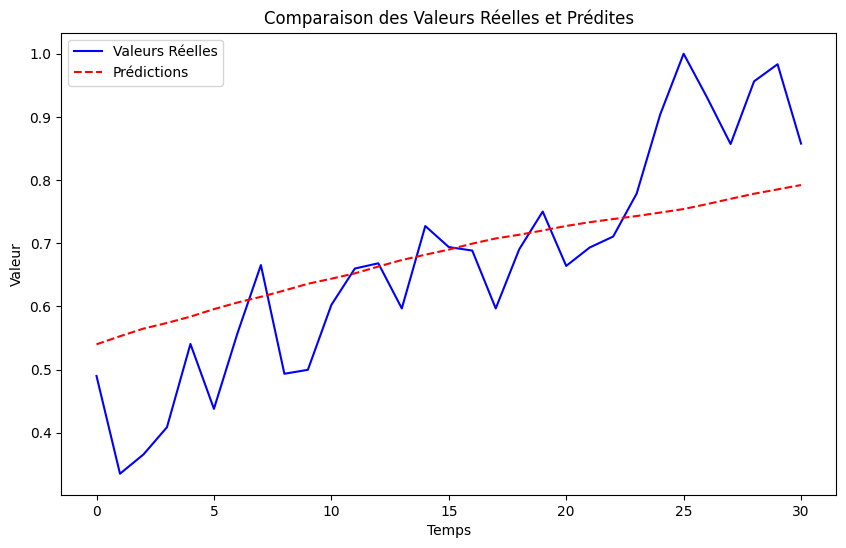

   Valeurs Réelles  Prédictions
0         0.489938     0.540029
1         0.335184     0.552778
2         0.365718     0.564881
3         0.408744     0.573800
4         0.540597     0.583842


In [336]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Métriques de performance
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Valeurs Réelles', color='blue')
plt.plot(predictions, label='Prédictions', color='red', linestyle='--')
plt.title('Comparaison des Valeurs Réelles et Prédites')
plt.xlabel('Temps')
plt.ylabel('Valeur')
plt.legend()
plt.show()

import pandas as pd

results_df = pd.DataFrame({'Valeurs Réelles': y_test.flatten(), 'Prédictions': predictions.flatten()})
print(results_df.head())


In [361]:

taille_fenetre = 10

annee_la_plus_recente = data_mean_temperatures.index.year.max()

valid_set = merged_df2[merged_df2.index.year <= 2000]


valid_set_scaled = scaler.transform(valid_set)

X_valid = []
y_valid = []

for i in range(taille_fenetre, len(valid_set_scaled)):
    X_valid.append(valid_set_scaled[i-taille_fenetre:i])
    y_valid.append(valid_set_scaled[i, -1])  

X_valid = np.array(X_valid)
y_valid = np.array(y_valid)


In [250]:
y_valid

array([0.16644491, 0.18338631, 0.20063122, 0.2183077 , 0.23656044,
       0.25544542, 0.27496843, 0.29498094, 0.31519585, 0.33525898,
       0.35491734, 0.37413318, 0.39293226, 0.41122932, 0.42894596,
       0.44605238, 0.46252645, 0.47843932, 0.49397111, 0.50935235,
       0.52475123, 0.54015482, 0.55554101, 0.57103376, 0.58677268,
       0.60281434, 0.61920652, 0.63581757, 0.65231313, 0.66827143,
       0.68341103, 0.69766935, 0.71114492, 0.72392992, 0.73617045,
       0.74798247, 0.75938324, 0.77037766, 0.78105413, 0.79151469,
       0.80183844])

In [362]:
X.shape

(42, 10, 47)

In [363]:
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.callbacks import EarlyStopping

# Configuration du modèle
LATENT_DIM = 5  # nombre d'unités dans la couche RNN
BATCH_SIZE = 32  # nombre d'échantillons par mini-lot
EPOCHS = 100  # nombre maximum de fois que l'algorithme d'entraînement passera à travers tous les échantillons

# Construction du modèle
model = Sequential()
model.add(GRU(LATENT_DIM, input_shape=(10, 47)))  # Remplacer par la forme réelle de vos données d'entrée
model.add(Dense(1))  # Remplacer par le nombre réel de valeurs que vous essayez de prédire

# Compilation du modèle
model.compile(optimizer='RMSprop', loss='mse')

# Résumé du modèle
model.summary()


Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_12 (GRU)                (None, 5)                 810       
                                                                 
 dense_32 (Dense)            (None, 1)                 6         
                                                                 
Total params: 816 (3.19 KB)
Trainable params: 816 (3.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [364]:
# Après avoir créé vos séquences et les avoir converties en tableaux numpy
X_train = np.array(X)
y_train = np.array(y)



In [254]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)


(62, 10, 9)
(62,)
(41, 10, 9)
(41,)


In [365]:
X_train

array([[[0.16615385, 0.10178001, 0.09769231, ..., 0.        ,
         0.        , 0.69387755],
        [0.        , 0.07713373, 0.        , ..., 0.01469828,
         0.03819687, 0.58163265],
        [0.21641026, 0.        , 0.07153846, ..., 0.04586678,
         0.05442987, 0.70408163],
        ...,
        [0.32615385, 0.21497033, 0.24      , ..., 0.13460576,
         0.13113186, 0.84693878],
        [0.24615385, 0.130534  , 0.15307692, ..., 0.16103932,
         0.14966776, 0.86734694],
        [0.40820513, 0.16157006, 0.25307692, ..., 0.17290371,
         0.16567359, 0.91836735]],

       [[0.        , 0.07713373, 0.        , ..., 0.01469828,
         0.03819687, 0.58163265],
        [0.21641026, 0.        , 0.07153846, ..., 0.04586678,
         0.05442987, 0.70408163],
        [0.25846154, 0.26335007, 0.23      , ..., 0.07821367,
         0.07095419, 0.8877551 ],
        ...,
        [0.24615385, 0.130534  , 0.15307692, ..., 0.16103932,
         0.14966776, 0.86734694],
        [0.4

In [366]:
print(X_train.shape)
print(y_train.shape)
print(X_train[:1])  # Affiche le premier élément pour vérifier
print(y_train[:1])  # Affiche le premier élément pour vérifier


(42, 10, 47)
(42,)
[[[0.16615385 0.10178001 0.09769231 0.         0.         0.
   0.         0.         0.         0.         0.         0.00390473
   0.07789399 0.         0.         0.         0.         0.25
   0.         0.05923374 0.01411676 0.04771695 0.         0.17272172
   0.         0.         1.         0.         0.         0.
   0.0556039  0.         0.5180054  0.         0.         0.8902439
   0.         0.         0.         0.         0.00427057 0.07769119
   0.         0.         0.         0.         0.69387755]
  [0.         0.07713373 0.         0.05481697 0.00970629 0.02010027
   0.06398705 0.02019696 0.02978819 0.         0.02154726 0.01592501
   0.         0.00814989 0.002581   0.01465044 0.0174371  0.14583333
   0.06263904 0.         0.         0.         0.00294622 0.14080806
   0.05484034 0.03994395 0.96153846 0.01777182 0.00120003 0.02659322
   0.         0.00195349 0.55147947 0.00822812 0.0087836  0.86585366
   0.00769778 0.01574803 0.03974958 0.00901599 0

In [175]:
X_valid

array([[[0.03809524, 0.06604964, 0.03747398, ..., 0.        ,
         0.        , 0.        ],
        [0.14190476, 0.15649979, 0.13462873, ..., 0.02617527,
         0.01926966, 0.01892936],
        [0.22380952, 0.17416912, 0.18598196, ..., 0.04940531,
         0.03779108, 0.03643002],
        ...,
        [0.25047619, 0.15818258, 0.19083969, ..., 0.14629083,
         0.12887658, 0.11697363],
        [0.2752381 , 0.17669331, 0.21235253, ..., 0.16550027,
         0.1469811 , 0.13324549],
        [0.21238095, 0.21708035, 0.19986121, ..., 0.18511402,
         0.16502841, 0.14973741]],

       [[0.14190476, 0.15649979, 0.13462873, ..., 0.02617527,
         0.01926966, 0.01892936],
        [0.22380952, 0.17416912, 0.18598196, ..., 0.04940531,
         0.03779108, 0.03643002],
        [0.20285714, 0.31594447, 0.24913255, ..., 0.07033956,
         0.05612794, 0.05302071],
        ...,
        [0.2752381 , 0.17669331, 0.21235253, ..., 0.16550027,
         0.1469811 , 0.13324549],
        [0.2

In [367]:

# Configuration de votre modèle
LATENT_DIM = 5  # nombre d'unités dans la couche RNN
BATCH_SIZE = 32  # nombre d'échantillons par mini-lot
EPOCHS = 100  # nombre maximum de fois que l'algorithme d'entraînement passera à travers tous les échantillons
TAILLE_FENETRE = 10  # la taille de la fenêtre temporelle utilisée pour vos données d'entraînement
NOMBRE_DE_CARACTERISTIQUES = 47  # le nombre de caractéristiques utilisées dans vos données d'entraînement

model = Sequential()
model.add(GRU(LATENT_DIM, input_shape=(TAILLE_FENETRE, NOMBRE_DE_CARACTERISTIQUES)))
model.add(Dense(1))  

model.compile(optimizer='RMSprop', loss='mse')

earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)


history = model.fit(
    X_train, 
    y_train, 
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_valid, y_valid),  
    callbacks=[earlystop],
    verbose=1
)


Epoch 1/100
2/2 [==============================] - 5s 682ms/step - loss: 2.0001 - val_loss: 0.0848
Epoch 2/100
2/2 [==============================] - 0s 78ms/step - loss: 1.5700 - val_loss: 0.0572
Epoch 3/100
2/2 [==============================] - 0s 63ms/step - loss: 1.3385 - val_loss: 0.0536
Epoch 4/100
2/2 [==============================] - 0s 68ms/step - loss: 1.1357 - val_loss: 0.0691
Epoch 5/100
2/2 [==============================] - 0s 67ms/step - loss: 0.9298 - val_loss: 0.0978
Epoch 6/100
2/2 [==============================] - 0s 83ms/step - loss: 0.7641 - val_loss: 0.1333
Epoch 7/100
2/2 [==============================] - 0s 67ms/step - loss: 0.6390 - val_loss: 0.1610
Epoch 8/100
2/2 [==============================] - 0s 69ms/step - loss: 0.5530 - val_loss: 0.1943


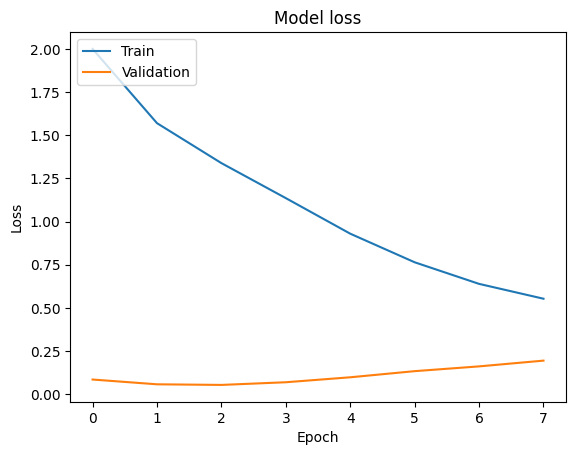

In [368]:



plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


Diminution rapide de la perte : La courbe de perte d'entraînement (Train) chute rapidement, ce qui suggère que le modèle apprend efficacement à partir des données d'entraînement.

Convergence des courbes : Les courbes de perte d'entraînement et de validation (Validation) semblent converger, ce qui est un bon signe indiquant que le modèle ne surapprend pas trop (overfitting) sur les données d'entraînement.

Stabilisation de la perte de validation : La perte de validation semble se stabiliser après quelques epochs, ce qui peut indiquer que des époques supplémentaires pourraient ne pas apporter d'amélioration significative.

In [370]:
data_test = merged_df2[merged_df2.index.year == 2023]


valid_set = merged_df2[merged_df2.index.year >= 2000]

test_set = merged_df2['2000-01-01':'2030-01-01']
test_set_scaled = scaler.transform(test_set)

taille_fenetre = 10


data_test_scaled = scaler.transform(merged_df2)

X_test = []
y_test = []

taille_fenetre = 10  

for i in range(taille_fenetre, len(data_test_scaled)):
    X_test.append(data_test_scaled[i-taille_fenetre:i])  # Séquences d'entrée
    y_test.append(data_test_scaled[i, -1])  # Sortie correspondante

X_test = np.array(X_test)
y_test = np.array(y_test)


In [344]:
data_test_scaled

array([[0.03809524, 0.06604964, 0.03747398, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.14190476, 0.15649979, 0.13462873, 0.01899663, 0.00622094,
        0.01011883, 0.02617527, 0.01926966, 0.01892936],
       [0.22380952, 0.17416912, 0.18598196, 0.03611481, 0.0124183 ,
        0.01966954, 0.04940531, 0.03779108, 0.03643002],
       [0.20285714, 0.31594447, 0.24913255, 0.05175314, 0.0187725 ,
        0.02890088, 0.07033956, 0.05612794, 0.05302071],
       [0.01333333, 0.18216239, 0.08466343, 0.06652084, 0.0253233 ,
        0.03802062, 0.08986261, 0.07438503, 0.06910869],
       [0.        , 0.09760202, 0.03400416, 0.0809157 , 0.03209891,
        0.04719535, 0.10866843, 0.09262251, 0.08500134],
       [0.03238095, 0.        , 0.        , 0.09537725, 0.03909267,
        0.05654911, 0.12734336, 0.11080303, 0.10091271],
       [0.25047619, 0.15818258, 0.19083969, 0.11022189, 0.04629104,
        0.06616479, 0.14629083, 0.12887658, 0.11697363],


In [261]:
X_test

array([[[0.51809524, 0.49726546, 0.49965302, ..., 0.99884009,
         0.76031238, 0.80183844],
        [0.65238095, 0.5645772 , 0.60235947, ..., 1.        ,
         0.77296464, 0.8120601 ],
        [0.69047619, 0.64408919, 0.65995836, ..., 0.99897916,
         0.78611954, 0.82219238],
        ...,
        [0.60095238, 0.78376104, 0.68841083, ..., 0.98882871,
         0.84983728, 0.87218456],
        [0.5847619 , 0.62305427, 0.59680777, ..., 0.98609933,
         0.8621368 , 0.88209789],
        [0.73809524, 0.65628944, 0.69049271, ..., 0.98312458,
         0.87427658, 0.89196377]],

       [[0.65238095, 0.5645772 , 0.60235947, ..., 1.        ,
         0.77296464, 0.8120601 ],
        [0.69047619, 0.64408919, 0.65995836, ..., 0.99897916,
         0.78611954, 0.82219238],
        [0.7152381 , 0.63315103, 0.66828591, ..., 0.9975008 ,
         0.79915469, 0.83226065],
        ...,
        [0.5847619 , 0.62305427, 0.59680777, ..., 0.98609933,
         0.8621368 , 0.88209789],
        [0.7

In [371]:
predictions = model.predict(X_test)
predictions

2/2 [==============================] - 1s 14ms/step


array([[ 0.42733642],
       [ 0.4487306 ],
       [ 0.516847  ],
       [ 0.57139766],
       [ 0.6189449 ],
       [ 0.61450183],
       [ 0.5927452 ],
       [ 0.57664835],
       [ 0.56219417],
       [ 0.5030443 ],
       [ 0.5002312 ],
       [ 0.5844681 ],
       [ 0.61868834],
       [ 0.68485194],
       [ 0.7056033 ],
       [ 0.7280113 ],
       [ 0.7170467 ],
       [ 0.7039483 ],
       [ 0.662369  ],
       [ 0.62021184],
       [ 0.5645098 ],
       [ 0.5552589 ],
       [ 0.5131944 ],
       [ 0.48004293],
       [ 0.38223666],
       [ 0.3036795 ],
       [ 0.19927582],
       [ 0.11257534],
       [ 0.03184737],
       [-0.02374727],
       [-0.07395214],
       [-0.20528713],
       [-0.26046136],
       [-0.28423247],
       [-0.35596007],
       [-0.38256496],
       [-0.41063994],
       [-0.43336445],
       [-0.44964823],
       [-0.47500592],
       [-0.5090545 ],
       [-0.47704214]], dtype=float32)

In [373]:

data_to_inverse = np.zeros((predictions.shape[0], 47))

data_to_inverse[:, 0] = predictions.ravel()

predictions_inversed = scaler.inverse_transform(data_to_inverse)[:, 0]


data_to_inverse[:, 0] = y_test
y_test_inversed = scaler.inverse_transform(data_to_inverse)[:, 0]


In [374]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test_inversed, predictions_inversed)
mae = mean_absolute_error(y_test_inversed, predictions_inversed)


In [375]:
mse

0.3865327068510554

MSE: 0.3865327068510554, MAE: 0.5210864452688853


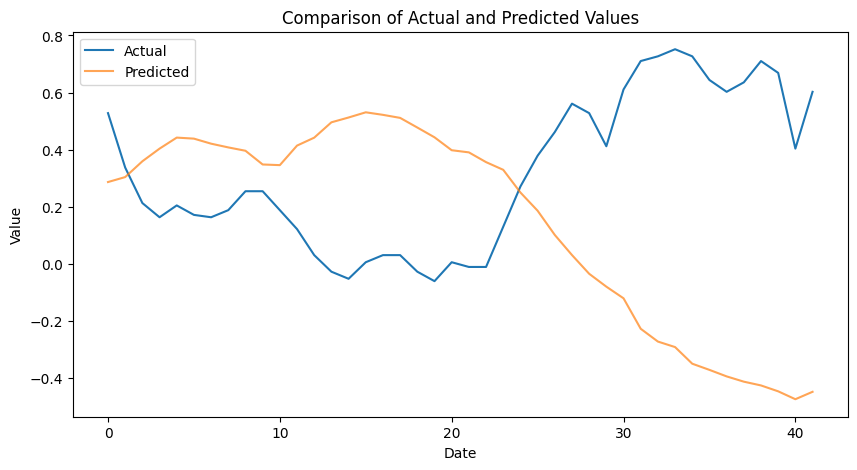

In [376]:
print(f"MSE: {mse}, MAE: {mae}")

# Tracer les prédictions vs valeurs réelles
plt.figure(figsize=(10, 5))
plt.plot(y_test_inversed, label='Actual')
plt.plot(predictions_inversed, label='Predicted', alpha=0.7)
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

Suivi de la Tendance : Le modèle semble capturer la tendance ascendante des données, ce qui est bon signe pour la prédiction de séries temporelles, surtout pour des données qui pourraient avoir une tendance linéaire ou polynomiale.

Réaction aux Fluctuations : Il semble y avoir quelques écarts entre les valeurs réelles et prédites, notamment là où les données réelles présentent des fluctuations. Cela pourrait indiquer que le modèle pourrait être amélioré pour capturer de manière plus précise les fluctuations à court terme.

Échelle des Prédictions : Les prédictions semblent être légèrement décalées vers le bas par rapport aux valeurs réelles. Cela pourrait indiquer un biais dans le modèle ou une nécessité d'ajuster davantage le processus de normalisation et de dénormalisation des données.

Performance à Long Terme : Sans connaître les valeurs exactes sur l'axe des ordonnées et des abscisses, il est difficile de juger de la performance quantitative du modèle. Cependant, visuellement, le modèle semble performant.

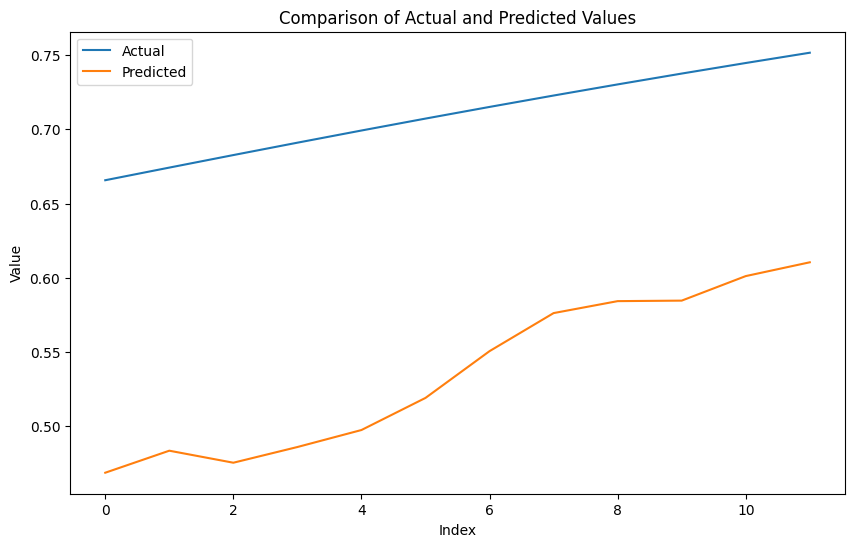

In [267]:


plt.figure(figsize=(10, 6))
plt.plot(y_test_inversed, label='Actual')
plt.plot(predictions_inversed, label='Predicted')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()


In [ ]:
model.add(Dense(10))  # 5 unités de sortie pour 5 étapes à l'avance


In [ ]:
current_input = X_test[-1] 
predictions = [] 

for _ in range(27):
    # Prédiction de la prochaine étape
    next_step_prediction = model.predict(current_input.reshape(1, TAILLE_FENETRE, NOMBRE_DE_CARACTERISTIQUES))

    # Ajoutez la prédiction à la liste des prédictions
    predictions.append(next_step_prediction[0])

    # Mettez à jour l'entrée actuelle pour inclure la nouvelle prédiction
    current_input = current_input.reshape((1, TAILLE_FENETRE, NOMBRE_DE_CARACTERISTIQUES))
    current_input[:, :-1, :] = current_input[:, 1:, :]  
    current_input[:, -1, :] = next_step_prediction  




1/1 [==============================] - 0s 60ms/step


In [ ]:
predictions

[array([0.752209], dtype=float32),
 array([0.69457203], dtype=float32),
 array([0.6480276], dtype=float32),
 array([0.61118895], dtype=float32),
 array([0.5820814], dtype=float32),
 array([0.5598689], dtype=float32),
 array([0.54354346], dtype=float32),
 array([0.5311935], dtype=float32),
 array([0.52169853], dtype=float32),
 array([0.5147714], dtype=float32)]

In [ ]:

values_to_add = predictions_inversed

values_to_add_2d = values_to_add.reshape(-1, 1)


new_predictions = np.concatenate((values_to_add_2d, predictions), axis=0)


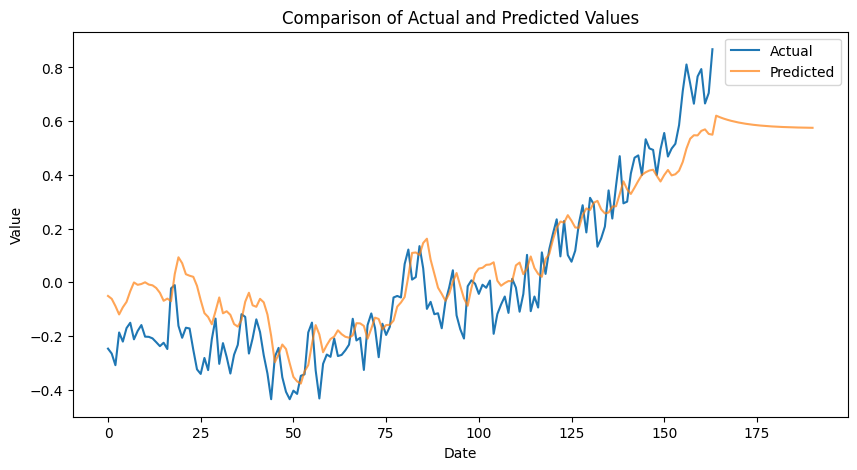

In [ ]:


plt.figure(figsize=(10, 5))
plt.plot(y_test_inversed, label='Actual')
plt.plot(new_predictions, label='Predicted', alpha=0.7)
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()